In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#font that supports unicode charachters
font_path = 'NotoSans-Regular.ttf'  # Update the path to the font if necessary
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

### Read the results from the landmark detection model 

In [5]:
df=pd.read_csv('landmark_detection_results.csv')

In [6]:
df

,accommodation_id,longitude,latitude,driving_duration,walking_duration,transit_duration,image_id,image,tag_name,probability,accommodation_name,dt,distance_to_bigben,description,score,response_time
0,37151070,-0.15444,51.49080,16,56,10,BZU37N77BV2F3LHYDM3TMMQOXKZMGOW5B6N6MZYAOCXCF7...,https://imgcy.trivago.com/partner-images/0e/69...,bedroom,0.9999,Passmore Street By Onefinestay,2024-03-07,3.395155,NaN,0.0,0.273663
1,37151070,-0.15444,51.49080,16,56,10,65OO2YWIMBEYPYI7TULDEBYJ65W5HRUUUF3PMBYLBTS5JE...,https://imgcy.trivago.com/partner-images/f7/5c...,bedroom,0.9954,Passmore Street By Onefinestay,2024-03-07,3.395155,NaN,0.0,0.338291
2,37151070,-0.15444,51.49080,16,56,10,RZRSSVMYZXVLIQT2VXQAKNO524ZEDJ65NG3JNWOZIYMV3F...,https://imgcy.trivago.com/partner-images/8e/63...,bedroom,0.9999,Passmore Street By Onefinestay,2024-03-07,3.395155,NaN,0.0,0.327386
3,37151070,-0.15444,51.49080,16,56,10,Y5IZPSMKFH26KUHXOFJRYAEXKZVEL6TCHLDRNUI4LRW64A...,https://imgcy.trivago.com/partner-images/c7/51...,building,0.9996,Passmore Street By Onefinestay,2024-03-07,3.395155,NaN,0.0,0.542081
4,37151070,-0.15444,51.49080,16,56,10,NUV5T3RYBEGCC4GXLJ3FA3TVCQSQJVPPMGZFPDSNAP6JMY...,https://imgcy.trivago.com/partner-images/6d/2b...,kids-area,0.9716,Passmore Street By Onefinestay,2024-03-07,3.395155,NaN,0.0,0.615594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76671,25253350,-0.12750,51.50722,4,14,10,OPRDTFXE7GRZWBINQLFHVBCBF67X2ISGDYJOHTMG5AE3QP...,https://imgcy.trivago.com/hotelier-images/73/e...,bedroom,0.9999,2 Bedroom Flat In Mayfair,2024-03-07,0.820251,NaN,0.0,0.131110
76672,25253350,-0.12750,51.50722,4,14,10,RZFWVMH5TW32S67G74L5EHKDOXAAFKM45O7ERHFZ2TOZ2X...,https://imgcy.trivago.com/partner-images/8e/4b...,bedroom,0.9999,2 Bedroom Flat In Mayfair,2024-03-07,0.820251,NaN,0.0,0.128994
76673,25253350,-0.12750,51.50722,4,14,10,NGQMN5KJNRMF3TERX7ZG526HV2VWHCACC7DA7KOHNUHDXY...,https://imgcy.trivago.com/partner-images/69/a0...,building,0.9999,2 Bedroom Flat In Mayfair,2024-03-07,0.820251,NaN,0.0,0.150750
76674,25253350,-0.12750,51.50722,4,14,10,TSY3I2RRLJTKYU67XEIMGE4EJ72TA3APVHLRWX44OXLUJR...,https://imgcy.trivago.com/partner-images/9c/b1...,bedroom,0.9969,2 Bedroom Flat In Mayfair,2024-03-07,0.820251,NaN,0.0,0.102159


### Calculate total and average response time of the api 

In [7]:
total_response_time_hours = round((df['response_time'].sum()/3600), 2)
average_response_time = round(df['response_time'].mean(),4)
std_dev = round(df['response_time'].std(), 4)
number_rows= len(df)
print(f"Total Response Time: {total_response_time_hours} hours to process {number_rows} images" )
print(f"Average Response Time: {average_response_time} seconds")
print("Standard Deviation of Response Times:", std_dev)

Total Response Time: 8.17 hours to process 76676 images
Average Response Time: 0.3839 seconds
Standard Deviation of Response Times: 0.289


In [8]:
number_distinct_accommodation = len(df['accommodation_id'].unique())
number_distinct_accommodation

7655

### Calculate total number of detected images & total accommodations that have landmarks

In [9]:
number_detected_images= len(df[df['score'] != 0.0])
number_detected_images

5219

### Set the threshold for the score for data analysis 

#### 1. Limit to only detected images 

In [10]:
df = df[df['score'] != 0.0]

#### 2. Calculate average score, standard deviation, and any natural breakpoints in the data

In [11]:
print(df['score'].describe())

count    5219.000000
mean        0.457087
std         0.172358
min         0.150540
25%         0.319303
50%         0.435850
75%         0.563327
max         0.993163
Name: score, dtype: float64


#### 3. Visualize the distribution of the score 

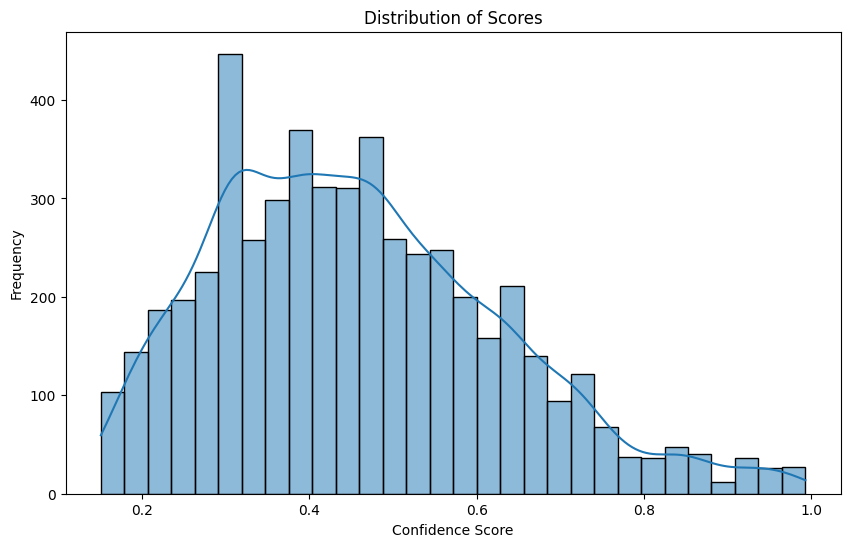

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], kde=True, bins=30)
plt.title('Distribution of Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

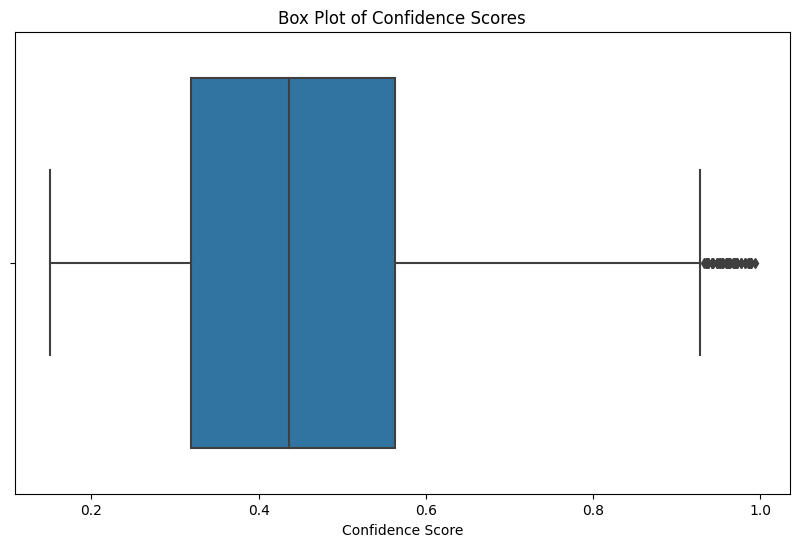

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['score'])
plt.title('Box Plot of Confidence Scores')
plt.xlabel('Confidence Score')
plt.show()

#### 3. Choosing a threshold 

threshold = df['score'].quantile(0.25)
filtered_df = df[df['score'] >= threshold]

In [14]:
filtered_df = df.copy()
filtered_df

,accommodation_id,longitude,latitude,driving_duration,walking_duration,transit_duration,image_id,image,tag_name,probability,accommodation_name,dt,distance_to_bigben,description,score,response_time
48,37140000,-0.15408,51.49230,17,55,10,DZYOZRSNXINZD2B2PU3RTDB7PWUX7EAMGITI7SPAG7CFRV...,https://imgcy.trivago.com/partner-images/1e/70...,building,0.9999,Chester Row Iv By Onefinestay,2024-03-07,3.271074,Wulf & Lamb,0.471699,0.569313
71,37134782,-0.14450,51.52320,18,41,20,JWDPZ6QQCBVANFMV4QFWETCZO2MGGAI4ECDSHOTFVFJIRZ...,https://imgcy.trivago.com/partner-images/4d/86...,building,0.9999,Park Crescent Mews East Ii By Onefinestay,2024-03-07,2.391721,Bang Bang Vietnamese Canteen,0.498729,0.508540
73,37134782,-0.14450,51.52320,18,41,20,ZHYAHYQRQQNI7QXEOUYKIRIGCGUAIDKZL72D4BC6XWVHVH...,https://imgcy.trivago.com/partner-images/c9/f0...,building,0.9997,Park Crescent Mews East Ii By Onefinestay,2024-03-07,2.391721,Griffin Tazza (Lion Vase),0.480606,0.690213
80,37133606,-0.11768,51.52326,12,26,18,AIC7CX553RTYWENZL2W76Q6DKGGDIG22ZHYEFWWON4K27A...,https://imgcy.trivago.com/partner-images/02/05...,bedroom,0.9999,2 Bed Apartment - Great Location,2024-03-07,1.436122,Foam,0.261104,0.104055
115,37130490,-0.08203,51.49760,13,50,19,TXIIYA6IFWEM2RDWCBPZ3EQYUCXUE67VLWL3DRENX2AN22...,https://imgcy.trivago.com/partner-images/9d/d0...,building,0.9999,Shard View 2 Bed Entire Flat,2024-03-07,2.791929,London Bridge,0.379974,0.106161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76617,25279996,-0.12750,51.50722,4,14,10,EFJLJRI34TV3CDRQM3O4SWOGV4FH2YTLLCYQYKCKCWTCEA...,https://imgcy.trivago.com/partner-images/21/52...,building,0.9207,Pass The Keys Apartment With A Private Garden ...,2024-03-07,0.820251,Virginia Settlers' Monument,0.430717,0.262617
76619,25279996,-0.12750,51.50722,4,14,10,4C36AA46X5ZPBWHCJKAZ7VP27ZVNW4CRKZ6GUP2ENJUVMV...,https://imgcy.trivago.com/partner-images/e0/b7...,building,0.9999,Pass The Keys Apartment With A Private Garden ...,2024-03-07,0.820251,Big Ben,0.486329,0.460036
76624,25279996,-0.12750,51.50722,4,14,10,26K5RJ3ZW2IIMR2KJFDXSDSKTHUW4E7NMINPCS2MHC6HAQ...,https://imgcy.trivago.com/partner-images/d7/95...,kids-area,0.9989,Pass The Keys Apartment With A Private Garden ...,2024-03-07,0.820251,St James's Park,0.453807,0.519399
76628,25268132,-0.12599,51.51801,10,19,14,LMLKXOC6Z6CHPBEJX7EUW4NEOTAC5DU454BFTG4UTNFNLW...,https://imgcy.trivago.com/partner-images/5b/16...,building,0.9991,"Museum Street Apartment, Sleeps 3",2024-03-07,1.063465,The British Museum,0.432493,0.186275


#### 4. Calculate % of accommodations with landmarks

In [15]:
distinct_accommodation_with_threshold=len(filtered_df['accommodation_id'].unique())
distinct_accommodation_with_threshold

1946

In [16]:
perc_accommodations_detected= (distinct_accommodation_with_threshold/number_distinct_accommodation)*100
print("Perctange of accommodations with a detected landmark in its gallery = ",perc_accommodations_detected, "%")

Perctange of accommodations with a detected landmark in its gallery =  25.421293272371 %


#### 5. Which Landmarks were detected (given that our Point of interest is the ladnmark: Big Ben in UK)

#font that supports unicode charachters
font_path = 'NotoSans-Regular.ttf'  # Update the path to the font if necessary
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()


In [17]:
# Calculate mean confidence scores for each landmark
mean_scores = filtered_df.groupby('description')['score'].mean().reset_index()
mean_scores.columns = ['description', 'mean_score']

# Count occurrences of each landmark
landmark_occurrence_count = filtered_df['description'].value_counts().reset_index()
landmark_occurrence_count.columns = ['description', 'occurrences']

# Merge the mean scores with the occurrences
landmark_occurrence = pd.merge(landmark_occurrence_count, mean_scores, on='description')

# This DataFrame now contains the description, occurrences, and mean_score for each landmark
print(landmark_occurrence)

                    description  occurrences  mean_score
0                 Meatliquor W1          193    0.310829
1                  Tower Bridge          128    0.616450
2            The British Museum          115    0.619516
3                       Big Ben           99    0.651290
4     Lastminute.com London Eye           95    0.468966
...                         ...          ...         ...
1577              Prince Albert            1    0.841195
1578             Snowshill Arms            1    0.256969
1579        Noël Coward Theatre            1    0.380817
1580         Le Petit Perroquet            1    0.196729
1581           White Mulberries            1    0.545324

[1582 rows x 3 columns]


In [18]:
# Assuming 'landmark_occurrence' is your DataFrame
display(landmark_occurrence)

,description,occurrences,mean_score
0,Meatliquor W1,193,0.310829
1,Tower Bridge,128,0.616450
2,The British Museum,115,0.619516
3,Big Ben,99,0.651290
4,Lastminute.com London Eye,95,0.468966
...,...,...,...
1577,Prince Albert,1,0.841195
1578,Snowshill Arms,1,0.256969
1579,Noël Coward Theatre,1,0.380817
1580,Le Petit Perroquet,1,0.196729


In [19]:
landmark_occurrence.to_csv('landmark_occurrence_mean_score.csv', index=False)

# Drop rows by index labels
filtered_landmark_occurrence = filtered_landmark_occurrence.drop([46,])

landmark_occurance.to_csv('list_ladnmarks_detected.csv', index=False)

plt.figure(figsize=(10, 6))  # Adjust the size as needed
ladnamrk_occurance_count.plot(kind='bar')  # Use 'barh' for a horizontal bar chart
plt.title('Frequency of Landmarks')
plt.xlabel('Description')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.show()

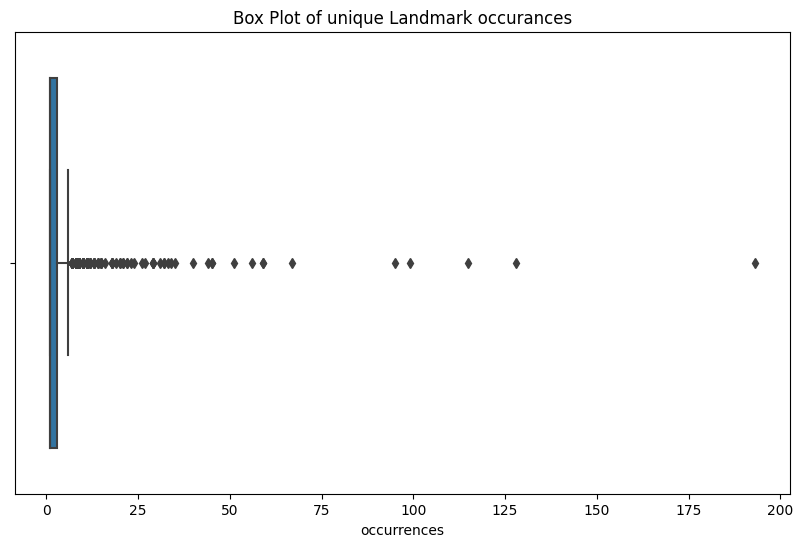

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=landmark_occurrence['occurrences'])
plt.title('Box Plot of unique Landmark occurances')
plt.xlabel('occurrences')
plt.show()

In [140]:
top_n = 20  # for example, top 20 descriptions
top_landmarks = landmark_occurrence.head(top_n)
top_landmarks

,description,occurrences
0,Meatliquor W1,193
1,Tower Bridge,128
2,The British Museum,115
3,Big Ben,99
4,Lastminute.com London Eye,95
5,The National Gallery,67
6,Tower Of London,59
7,St James's Park,59
8,London Bridge,56
9,Pret A Manger,51


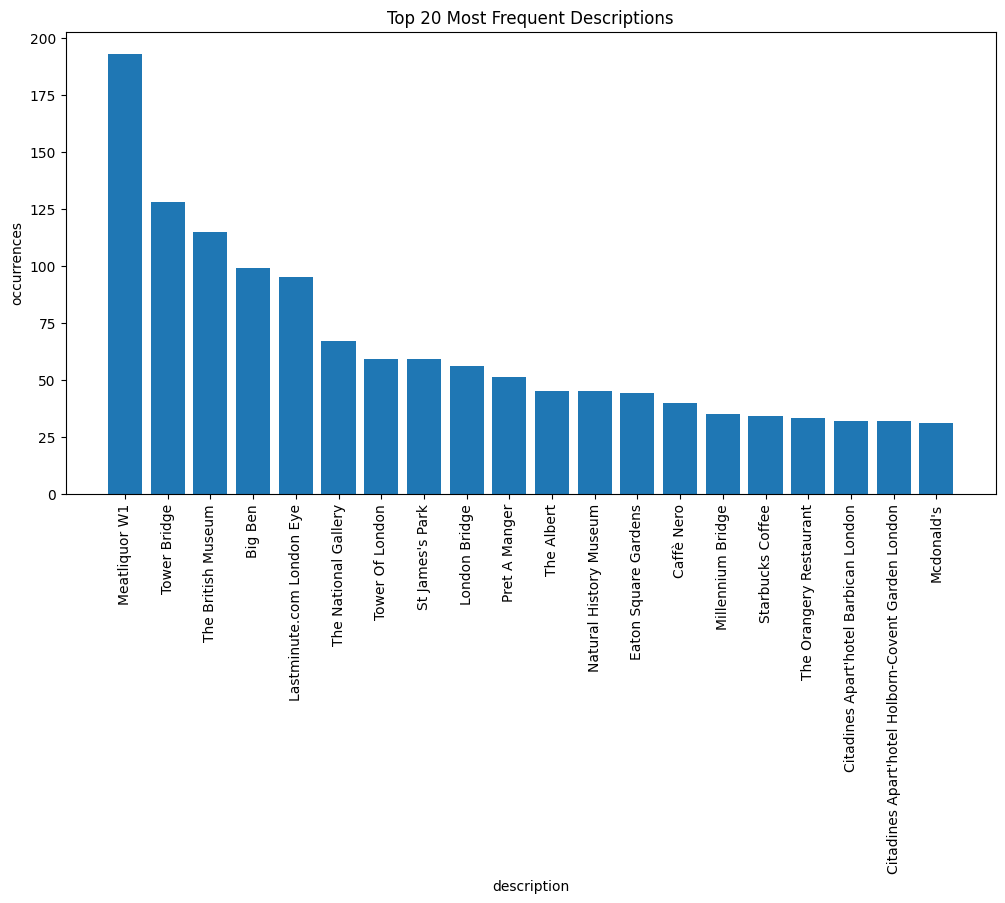

In [141]:
plt.figure(figsize=(12, 6))
plt.bar(top_landmarks['description'], top_landmarks['occurrences'])
plt.title(f'Top {top_n} Most Frequent Descriptions')
plt.xlabel('description')
plt.ylabel('occurrences')
plt.xticks(rotation=90)
plt.show()

#### Distribution of big ben occurances vs their respective distance from the big ben

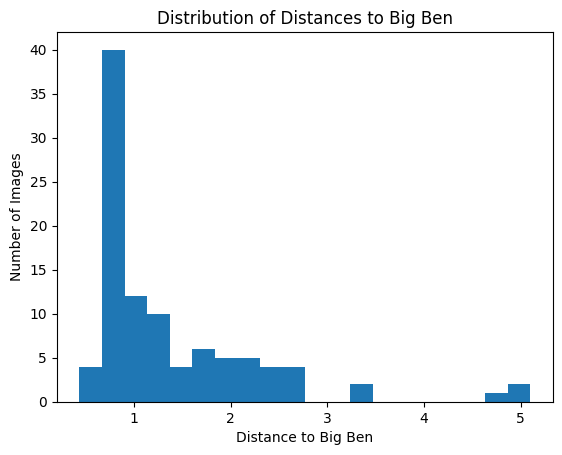

In [90]:
big_ben_df = df[df['description'] == 'Big Ben']
plt.hist(big_ben_df['distance_to_bigben'], bins=20)  # Adjust the number of bins as needed
plt.title('Distribution of Distances to Big Ben')
plt.xlabel('Distance to Big Ben')
plt.ylabel('Number of Images')
plt.show()

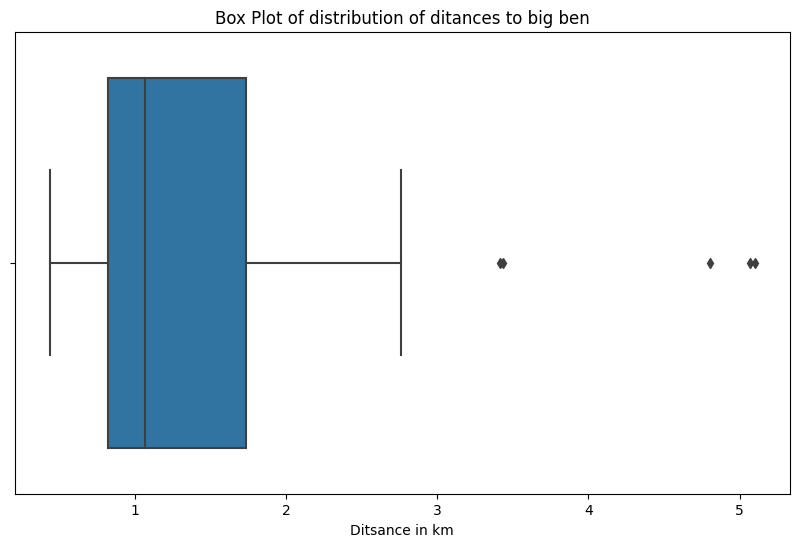

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=big_ben_df['distance_to_bigben'])
plt.title('Box Plot of distribution of ditances to big ben')
plt.xlabel('Ditsance in km')
plt.show()

In [92]:
#### For manual evaluation, save a csv file of the bing ben dataframe on https://www.makesense.ai

big_ben_df.to_csv('big_ben_df.csv', index=False)

In [93]:
filtered_landmark_occurrence = landmark_occurrence[landmark_occurrence['description'].str.contains('British Museum|Big Ben|Westminster|Tower of London|Buckingham Palace|Palace of Westminster|Westminster Abbey|Westminster Bridge|St Paul’s Cathedral|Trafalgar Square|London Eye|Shard|Tower Bridge|Wembley Stadium|Gherkin|Houses of Parliament', case=False, na=False)]
filtered_landmark_occurrence

,description,occurrences
1,Tower Bridge,128
2,The British Museum,115
3,Big Ben,99
4,Lastminute.com London Eye,95
6,Tower Of London,59
27,Trafalgar Square,23
38,Westminster Bridge,18
46,Citadines Apart’hotel Trafalgar Square London,14
99,London Eye Ticket Office,8
103,30 St Mary Axe (The Gherkin),8


In [94]:
# Drop rows by index labels
filtered_landmark_occurrence = filtered_landmark_occurrence.drop([46,99,151,240,315,403,486,618,623,652,694,875,1057,1155,1321,1509])
filtered_landmark_occurrence

,description,occurrences
1,Tower Bridge,128
2,The British Museum,115
3,Big Ben,99
4,Lastminute.com London Eye,95
6,Tower Of London,59
27,Trafalgar Square,23
38,Westminster Bridge,18
103,30 St Mary Axe (The Gherkin),8
131,Palace Of Westminster,7
179,The Shard,5


In [95]:
merged_df = pd.merge(df, filtered_landmark_occurrence[['description']], on='description', how='inner')
merged_df

,accommodation_id,longitude,latitude,driving_duration,walking_duration,transit_duration,image_id,image,tag_name,probability,accommodation_name,dt,distance_to_bigben,description,score,response_time
0,37117240,-0.12156,51.51292,6,8,8,LQZAJCT4ZPKEFCEVQEIUXVAFFRK3Y7VCZD47KBCA7GDJQO...,https://imgcy.trivago.com/partner-images/5c/32...,building,0.9999,Stunning 3-bedroom Apartment Combines Modern L...,2024-03-07,0.436994,Big Ben,0.726520,0.233737
1,37002286,-0.11198,51.49616,10,29,14,AQXHERFWCCE7ZMYPPCQ5DK55ZQA7E7LLRAVJF4ERSOOFVD...,https://imgcy.trivago.com/partner-images/04/2e...,building,1.0000,"Guestready - Stylish Skyline Views, Central Lo...",2024-03-07,1.613119,Big Ben,0.811984,0.160189
2,36840476,-0.11609,51.48661,15,47,20,4VSXJCCLACXZIB2WWGFTAS2WHJD7UJOTIXH4NPRAA3OOR3...,https://imgcy.trivago.com/partner-images/e5/65...,building,0.9999,"New Central 1br Wstunning View, 5 Min Vauxhall St",2024-03-07,2.640973,Big Ben,0.921683,0.143448
3,36834002,-0.09608,51.48916,16,47,17,FEG2Z6GPDJ5X3PICU4J23QRAL3HQV6IGPKNTWSLHCZTU53...,https://imgcy.trivago.com/partner-images/29/0d...,building,0.9999,Stunning 1 Bedroom Central London Apartment Zo...,2024-03-07,2.758115,Big Ben,0.937068,0.161804
4,36834002,-0.09608,51.48916,16,47,17,K75YND452KJSTYPOGKE373GD5DTLVDPMBRVEPQYDPTPGY3...,https://imgcy.trivago.com/partner-images/57/fb...,swimming-pool,0.9633,Stunning 1 Bedroom Central London Apartment Zo...,2024-03-07,2.758115,Big Ben,0.630903,0.121960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,46832,-0.10219,51.50610,9,23,16,3ERUOOVFDLAGJLMBZHU22QRWRFUPS4ZQT36ZWD5XMIAHSX...,https://imgcy.trivago.com/partner-images/d9/23...,building,0.9999,Holiday Inn Express London - Southwark,2024-03-07,1.114754,Palace Of Westminster,0.376706,0.361036
554,46539,-0.07737,51.51093,9,40,14,HHWELDHJZU6GDBQT64L4BQMRMQFN24R4VHKAV4NLWPXD6T...,https://imgcy.trivago.com/partner-images/39/ec...,building,0.9999,Bridgestreet Pepys Street,2024-03-07,2.727606,Palace Of Westminster,0.465586,0.290676
555,46461,-0.13245,51.50752,10,19,11,YOCE5VDTKT3X6YCMRVWEMD36FJL2MK3AVYRMUZSBB46FFL...,https://imgcy.trivago.com/partner-images/c3/84...,building,0.9972,Sofitel London St James,2024-03-07,1.129889,Palace Of Westminster,0.708477,0.402796
556,8003044,-0.09626,51.51041,5,21,14,GXVVATZDDOWNRD5CN7CUVAE7XGOJ3JNLY5H64EMT2RX7TA...,https://imgcy.trivago.com/partner-images/35/eb...,building,0.9999,Superior 2 Bedroom 2 Bath Apartment St Pauls L...,2024-03-07,1.419610,Palace Of Westminster,0.671675,0.462791


In [96]:
sampled_df = df[~df['image_id'].isin(merged_df['image_id'])]

# Sample 358 rows from the filtered DataFrame
sampled_df =sampled_df.sample(n=358)
sampled_df['description'] = None
sampled_df

,accommodation_id,longitude,latitude,driving_duration,walking_duration,transit_duration,image_id,image,tag_name,probability,accommodation_name,dt,distance_to_bigben,description,score,response_time
28484,1504047,-0.12759,51.52702,13,33,19,DX64WCVN23LSWFWPBOWT5YGBMO45N3SF3HBQLCFHXQUJCV...,https://imgcy.trivago.com/partner-images/1d/fd...,building,0.9999,Studios 2 Let Serviced Apartments,2024-03-07,1.998302,None,0.750398,0.124018
41367,10405908,-0.12750,51.50722,4,14,14,RB77EISJ5MQDUEGFZSGFH3EGQQNEDPHANSIYFNAFJJKIN6...,https://imgcy.trivago.com/partner-images/88/7f...,building,1.0000,Lovely Family Apartments For Upto 6 Near Oxfor...,2024-03-07,0.820251,None,0.413374,0.468961
68270,18426,-0.18294,51.49556,21,77,17,SWPQ2FXDSA2PH4KDMR56KNBPFJZ5C77DBKGBBAA4BPG5CG...,https://imgcy.trivago.com/partner-images/95/9f...,building,1.0000,Meliá London Kensington Meliá Collection,2024-03-07,4.866410,None,0.632710,0.451684
35613,22032936,-0.12750,51.50722,4,14,11,3DL2RXNO4NVWZFBC4L2YATHITDKB2DDWBF5LQ6JLO2C6GM...,https://imgcy.trivago.com/partner-images/d8/d7...,building,1.0000,Victorian Conversion Garden Flat,2024-03-07,0.820251,None,0.579433,0.213040
47108,20648498,-0.12750,51.50722,4,14,9,4MLPB64JFHPSIM2YTAFY4U5HCCVUIUABRH7GUVMVTJZKKO...,https://imgcy.trivago.com/partner-images/e3/16...,building,1.0000,Stunning Central Richmond With Garden,2024-03-07,0.820251,None,0.650984,0.381180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081,15539868,-0.12750,51.50722,4,14,11,3GULQZRL6CZBIYGHWZYR23WS34TE2STUTJSCREEQSN3WGI...,https://imgcy.trivago.com/partner-images/d9/a8...,building,0.9186,Stilfuld Lejlighed Ved Siden Af Hyde Park - Gr...,2024-03-07,0.820251,None,0.914156,0.482529
18506,24126798,-0.12750,51.50722,4,14,10,BDUJ3ODZSKVEQSVO3JXVIVJBBDOAGVMAIYKZ67IIASSA5Q...,https://imgcy.trivago.com/partner-images/08/e8...,building,0.9968,Sale! 3-bedroom Jaw-dropping Luxury With Patio...,2024-03-07,0.820251,None,0.661292,0.374477
23651,29475702,-0.07589,51.51240,10,42,17,BBQYUU2ST4UHNC6RLPC75FQGRLUDQ7JHGDLL37H7RORTLV...,https://imgcy.trivago.com/partner-images/08/61...,building,0.9999,Stunning One Bedroom In Business District,2024-03-07,2.838344,None,0.261255,0.155204
27618,2172390,-0.10070,51.52041,10,25,17,QAAG6EM5KGDDXSEXE7DXDP3ANIJIXDPE4QIVLMJAZC3Z5P...,https://imgcy.trivago.com/hotelier-images/80/0...,building,1.0000,The Fox &Anchor,2024-03-07,1.576889,None,0.768762,0.176558


In [97]:
union_df = pd.concat([sampled_df, merged_df], ignore_index=True)
union_df


,accommodation_id,longitude,latitude,driving_duration,walking_duration,transit_duration,image_id,image,tag_name,probability,accommodation_name,dt,distance_to_bigben,description,score,response_time
0,1504047,-0.12759,51.52702,13,33,19,DX64WCVN23LSWFWPBOWT5YGBMO45N3SF3HBQLCFHXQUJCV...,https://imgcy.trivago.com/partner-images/1d/fd...,building,0.9999,Studios 2 Let Serviced Apartments,2024-03-07,1.998302,None,0.750398,0.124018
1,10405908,-0.12750,51.50722,4,14,14,RB77EISJ5MQDUEGFZSGFH3EGQQNEDPHANSIYFNAFJJKIN6...,https://imgcy.trivago.com/partner-images/88/7f...,building,1.0000,Lovely Family Apartments For Upto 6 Near Oxfor...,2024-03-07,0.820251,None,0.413374,0.468961
2,18426,-0.18294,51.49556,21,77,17,SWPQ2FXDSA2PH4KDMR56KNBPFJZ5C77DBKGBBAA4BPG5CG...,https://imgcy.trivago.com/partner-images/95/9f...,building,1.0000,Meliá London Kensington Meliá Collection,2024-03-07,4.866410,None,0.632710,0.451684
3,22032936,-0.12750,51.50722,4,14,11,3DL2RXNO4NVWZFBC4L2YATHITDKB2DDWBF5LQ6JLO2C6GM...,https://imgcy.trivago.com/partner-images/d8/d7...,building,1.0000,Victorian Conversion Garden Flat,2024-03-07,0.820251,None,0.579433,0.213040
4,20648498,-0.12750,51.50722,4,14,9,4MLPB64JFHPSIM2YTAFY4U5HCCVUIUABRH7GUVMVTJZKKO...,https://imgcy.trivago.com/partner-images/e3/16...,building,1.0000,Stunning Central Richmond With Garden,2024-03-07,0.820251,None,0.650984,0.381180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,46832,-0.10219,51.50610,9,23,16,3ERUOOVFDLAGJLMBZHU22QRWRFUPS4ZQT36ZWD5XMIAHSX...,https://imgcy.trivago.com/partner-images/d9/23...,building,0.9999,Holiday Inn Express London - Southwark,2024-03-07,1.114754,Palace Of Westminster,0.376706,0.361036
912,46539,-0.07737,51.51093,9,40,14,HHWELDHJZU6GDBQT64L4BQMRMQFN24R4VHKAV4NLWPXD6T...,https://imgcy.trivago.com/partner-images/39/ec...,building,0.9999,Bridgestreet Pepys Street,2024-03-07,2.727606,Palace Of Westminster,0.465586,0.290676
913,46461,-0.13245,51.50752,10,19,11,YOCE5VDTKT3X6YCMRVWEMD36FJL2MK3AVYRMUZSBB46FFL...,https://imgcy.trivago.com/partner-images/c3/84...,building,0.9972,Sofitel London St James,2024-03-07,1.129889,Palace Of Westminster,0.708477,0.402796
914,8003044,-0.09626,51.51041,5,21,14,GXVVATZDDOWNRD5CN7CUVAE7XGOJ3JNLY5H64EMT2RX7TA...,https://imgcy.trivago.com/partner-images/35/eb...,building,0.9999,Superior 2 Bedroom 2 Bath Apartment St Pauls L...,2024-03-07,1.419610,Palace Of Westminster,0.671675,0.462791


In [98]:
union_df.to_csv('data_evaluation_input.csv')

##### import requests
from PIL import Image
from io import BytesIO
import os

In [101]:
import os
import requests
from PIL import Image
from io import BytesIO

folder_path = 'image_input_folder'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Function to download images and save as JPEG, converting RGBA to RGB if necessary, cannot write mode RGBA as JPEG error fix
def download_image(url, image_id, folder_path):
    response = requests.get(url)
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))

        # Check if the image has an alpha channel (RGBA) and convert to RGB 
        if image.mode in ('RGBA', 'LA') or (image.mode == 'P' and 'transparency' in image.info):
            # Convert to RGB, discarding the alpha channel
            image = image.convert('RGB')
        
        image.save(os.path.join(folder_path, f'{image_id}.jpg'), 'JPEG')


for index, row in union_df.iterrows():
    image_url = row['image']  # Column name for URLs
    image_id = row['image_id']  # Column name for image IDs
    download_image(image_url, image_id, folder_path)


In [96]:
labelled_big_ben_df=pd.read_csv('manual_labels_bigben_df.csv')
labelled_big_ben_df

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,Big Ben,704,279,620,1611,1025805619.jpg,3840,2880
1,Big Ben,3,19,252,315,129415597.jpg,607,380
2,Big Ben,108,11,558,989,131503436.jpg,666,1000
3,Big Ben,572,7,244,728,131545478.jpg,1000,762
4,Big Ben,211,2,1122,1998,185206792.jpg,1333,2000
5,Big Ben,543,47,180,423,230453664.jpg,1024,683
6,Big Ben,1659,43,341,1409,249154360.jpg,2000,1500
7,Big Ben,1118,48,380,1361,311669324.jpg,2560,1714
8,Big Ben,754,329,598,1493,326782381.jpg,3840,2880
9,Big Ben,3132,436,492,1643,326786980.jpg,3840,2160


In [97]:
labelled_big_ben_df['image_name'] = labelled_big_ben_df['image_name'].str.replace('.jpg', '', regex=False)
labelled_big_ben_df['image_name'] = pd.to_numeric(labelled_big_ben_df['image_name'], errors='coerce')
column_type = labelled_big_ben_df['image_name'].dtypes





In [98]:
labelled_big_ben_df= labelled_big_ben_df.rename(columns={'image_name': 'image_id'})

In [99]:
result_df = pd.merge(big_ben_df, labelled_big_ben_df, on='image_id', how='left')

In [103]:
result_df
result_df.to_csv('extract_bigben_labelvsdescription.csv')

#### Calculate TP and FP big ben 
##### True Positive (TP): The number of times the prediction correctly identifies "Big Ben".
##### False Positive (FP): The number of times the prediction incorrectly identifies "Big Ben"

In [102]:
number_rows_result_df= len(result_df)
TP = ((result_df['label_name'] == 'Big Ben') & (result_df['description'] == 'Big Ben')).sum()

# Calculate False Positives (FP)
FP = ((result_df['label_name'] != 'Big Ben') & (result_df['description'] == 'Big Ben')).sum()

print(f"True Positives: {TP}")
print(f"False Positives: {FP}")

True Positives: 56
False Positives: 4
